# Evaluation for the Decision Tree

After modeling, we raise the question where our models tend to systematic errors. This might help us to further improve our model (e.g., by Feature Engineering).

Especially interesting are systematic errors between "False Positive" and "True Negative" on one hand, and "False Negative" and "True Positive" on the other.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import os

from sklearn.linear_model import LogisticRegression
from myfunctions import plot_categorical_features
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

import warnings
warnings.filterwarnings("ignore")

In [2]:
# read the dataframes with prediction outcome from last notebook 
df_train_eval = pd.read_pickle('./data/eval/df_train_eval_decision_tree.pkl')
df_test_eval = pd.read_pickle('./data/eval/df_test_eval_decision_tree.pkl')

In [3]:
# create a column that contains the classification outcome

def classification_evaluation(row):
    '''input: row of a dataframe
    output: classification outcome based on y_pred'''
    if row['churn_risk_score'] == 1 and row['y_pred'] == 1:
        return 'TruePositive'
    elif row['churn_risk_score'] == 0 and row['y_pred'] == 0:
        return 'TrueNegative'
    elif row['churn_risk_score'] == 1 and row['y_pred'] == 0:
        return 'FalseNegative'
    elif row['churn_risk_score'] == 0 and row['y_pred'] == 1:
        return 'FalsePositive'

df_test_eval['classification_outcomes'] = df_test_eval.apply(classification_evaluation, axis=1)


In [4]:
df_test_eval.head(20)

gender_M gender_Unknown region_category_Town region_category_Unknown  \
0       0.0            0.0                  0.0                     0.0   
1       0.0            0.0                  1.0                     0.0   
2       0.0            0.0                  1.0                     0.0   
3       1.0            0.0                  0.0                     1.0   
4       0.0            0.0                  1.0                     0.0   
5       1.0            0.0                  0.0                     0.0   
6       1.0            0.0                  0.0                     0.0   
7       0.0            0.0                  0.0                     0.0   
8       1.0            0.0                  0.0                     1.0   
9       0.0            0.0                  1.0                     0.0   
10      1.0            0.0                  0.0                     0.0   
11      0.0            0.0                  1.0                     0.0   
12      1.0            0.0                  0.0                     0.0   
13      0.0            0.0                  0.0                     0.0   
14      1.0            0.0                  0.0                     0.0   
15      1.0            0.0                  0.0                     0.0   
16      1.0            0.0                  1.0                     0.0   
17      1.0            0.0                  1.0                     0.0   
18      0.0            0.0                  0.0                     0.0   
19      0.0            0.0                  1.0                     0.0   

   region_category_Village joined_through_referral_Unknown  \
0                      0.0                             0.0   
1                      0.0                             0.0   
2                      0.0                             0.0   
3                      0.0                             0.0   
4                      0.0                             0.0   
5                      0.0                             1.0   
6                      0.0                             0.0   
7                      0.0                             0.0   
8                      0.0                             0.0   
9                      0.0                             0.0   
10                     1.0                             1.0   
11                     0.0                             1.0   
12                     0.0                             0.0   
13                     1.0                             0.0   
14                     0.0                             1.0   
15                     0.0                             0.0   
16                     0.0                             0.0   
17                     0.0                             0.0   
18                     0.0                             0.0   
19                     0.0                             0.0   

   joined_through_referral_Yes preferred_offer_types_Gift Vouchers/Coupons  \
0                          0.0                                         1.0   
1                          0.0                                         0.0   
2                          1.0                                         0.0   
3                          0.0                                         1.0   
4                          0.0                                         0.0   
5                          0.0                                         1.0   
6                          0.0                                         1.0   
7                          0.0                                         0.0   
8                          1.0                                         0.0   
9                          0.0                                         1.0   
10                         0.0                                         1.0   
11                         0.0                                         0.0   
12                         1.0                                         0.0   
13                         1.0  

In [10]:
df_test_eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6946 entries, 0 to 6945
Data columns (total 39 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   gender_M                                     6946 non-null   object
 1   gender_Unknown                               6946 non-null   object
 2   region_category_Town                         6946 non-null   object
 3   region_category_Unknown                      6946 non-null   object
 4   region_category_Village                      6946 non-null   object
 5   joined_through_referral_Unknown              6946 non-null   object
 6   joined_through_referral_Yes                  6946 non-null   object
 7   preferred_offer_types_Gift Vouchers/Coupons  6946 non-null   object
 8   preferred_offer_types_Without Offers         6946 non-null   object
 9   medium_of_operation_Both                     6946 non-null   object
 10  medium_of_op

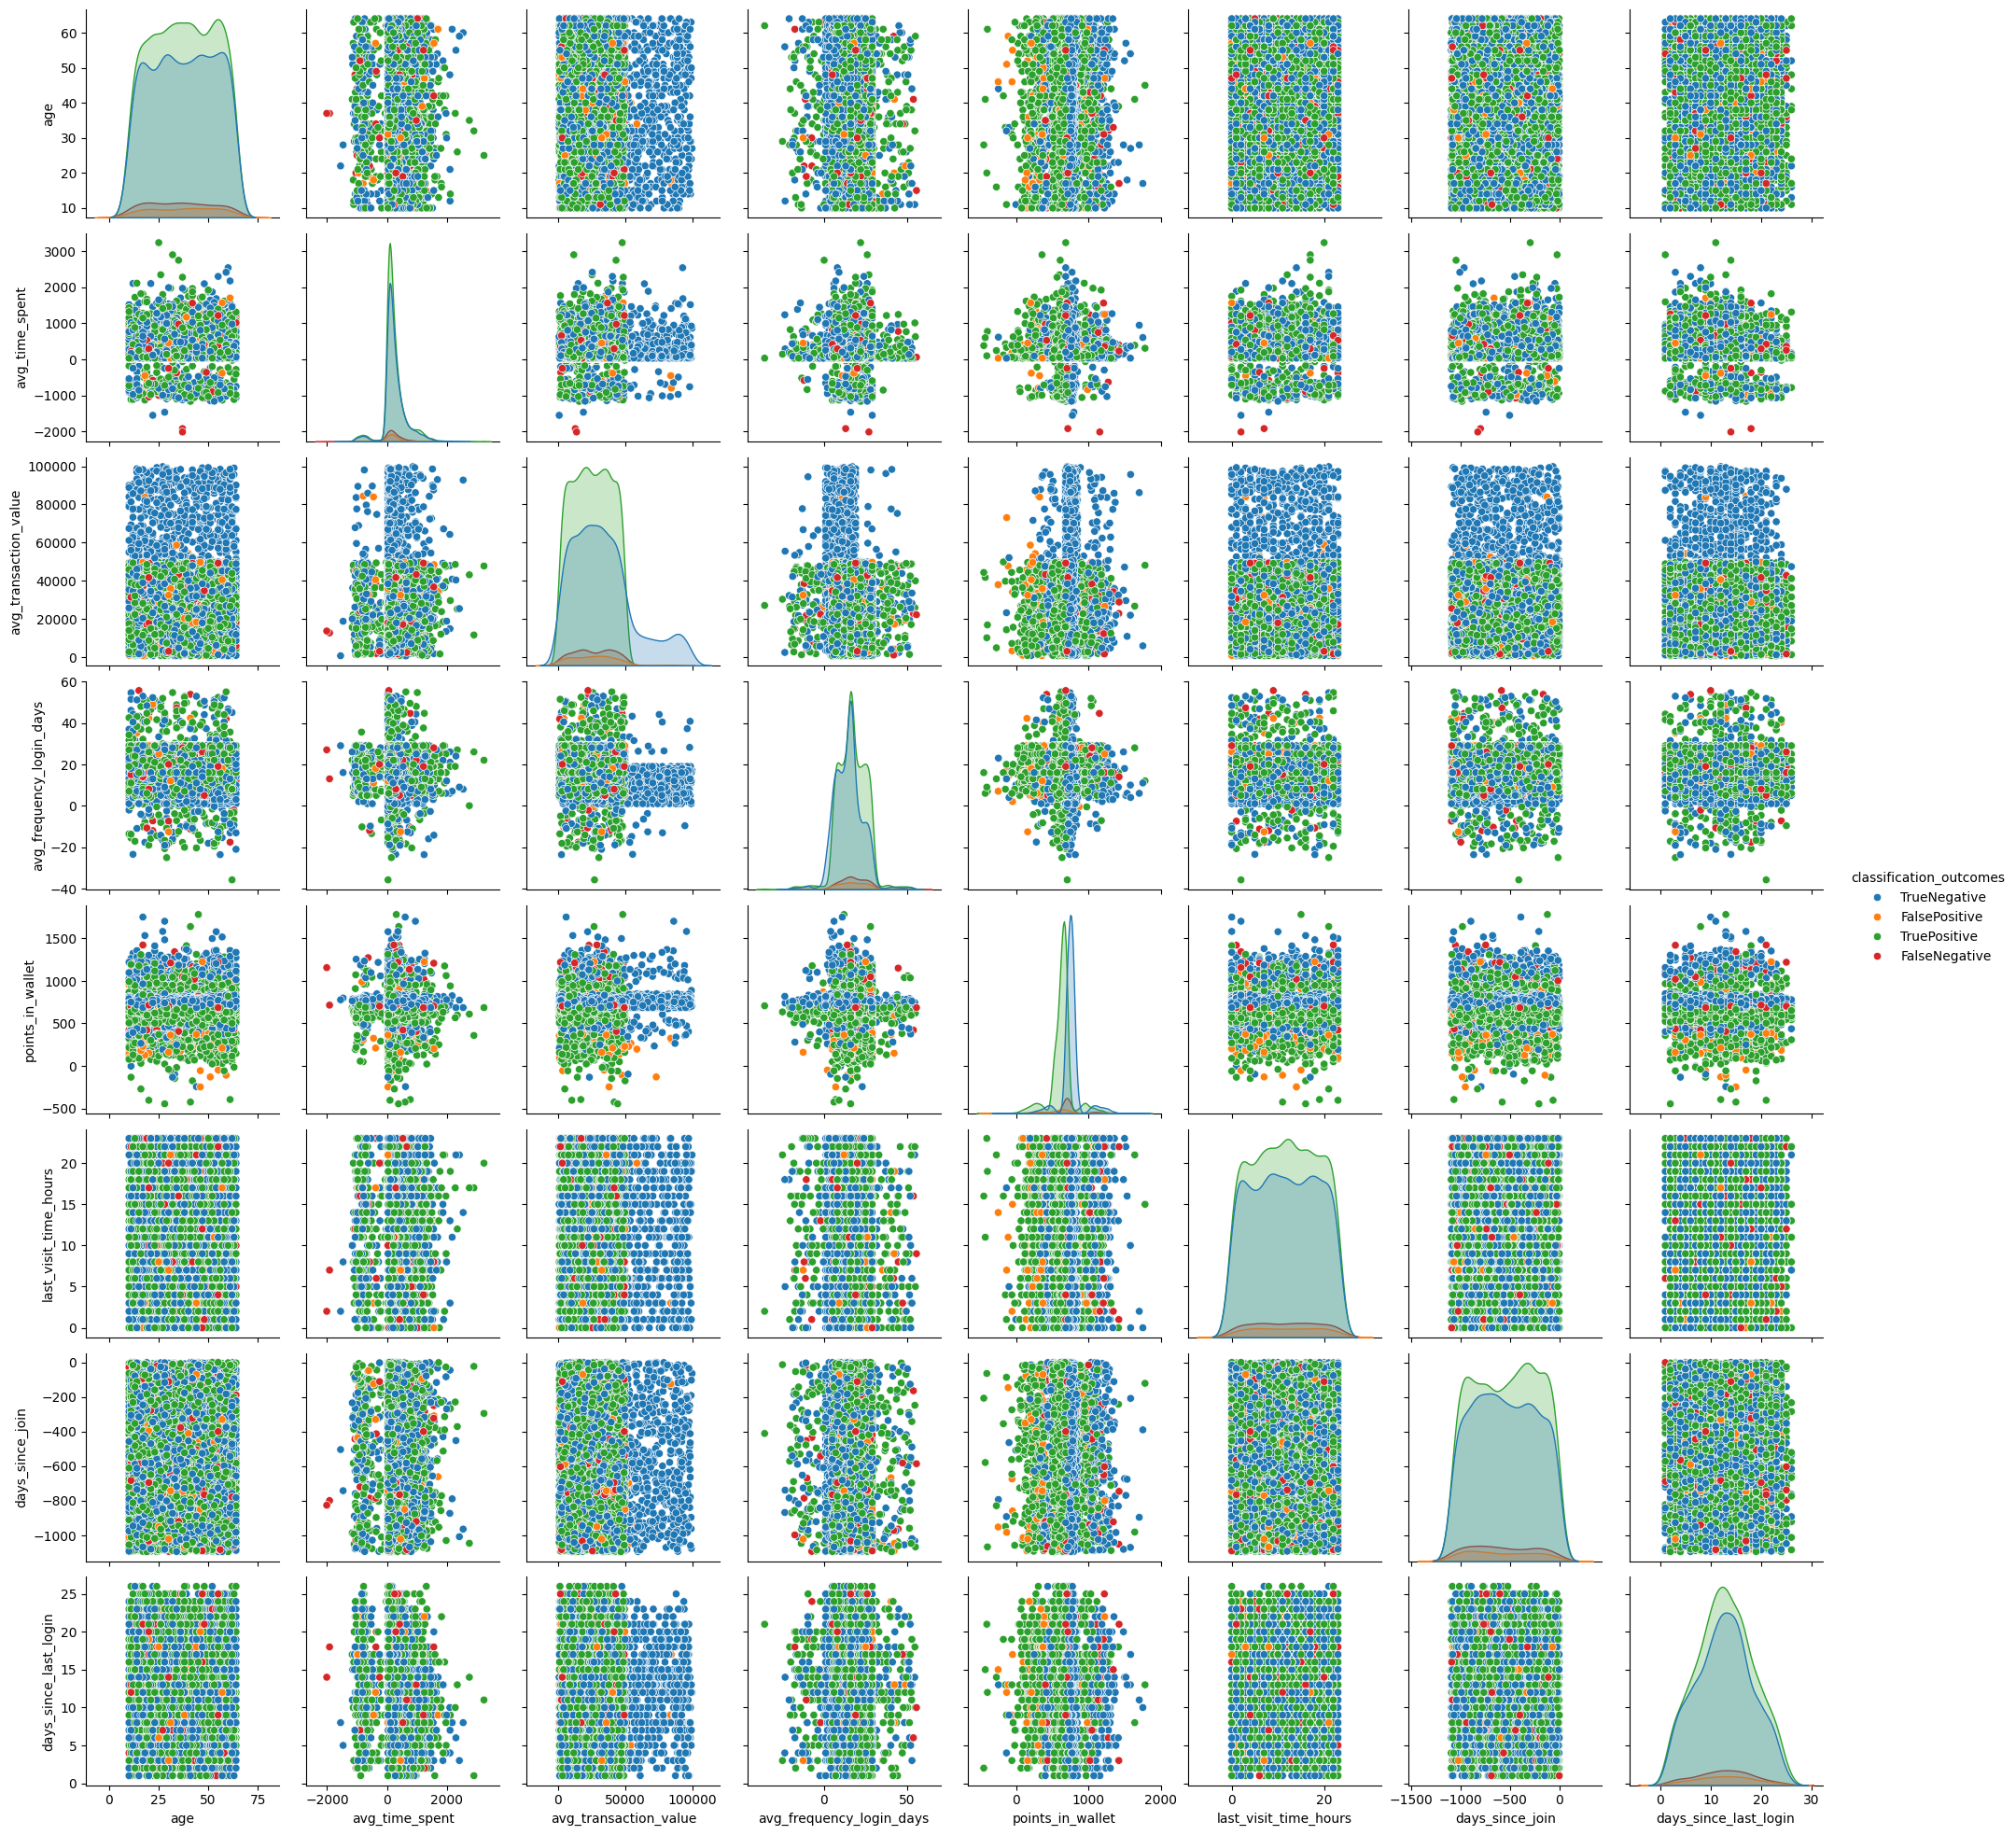

In [5]:
#define numerical features
num_features = ["age", "avg_time_spent", "avg_transaction_value", "avg_frequency_login_days", "points_in_wallet", "last_visit_time_hours", "days_since_join", "days_since_last_login","classification_outcomes"]

#set order for legend
hue_order = ["TrueNegative", "FalsePositive", "TruePositive", "FalseNegative"]

#plot pairplot to get a sense for systematic misevaluations
sns.pairplot(df_test_eval[num_features], hue='classification_outcomes', plot_kws=dict(alpha= 1), hue_order= hue_order)

The histograms for the different numerical features show a high overlap for most of the features. Differences may be found for 'avg_transcation_value' and 'points_in_wallet'.

- **avg_transaction_value**:
    - High values can be found for TN
    - TN shows two "populations"
    - other classifications outcomes and the majority of TN is within the first "population"
- **points_in_wallet**:
    - high values for TN, low values for TP, while FN and FP seem to be somewhere in between

Due to the high number of datapoints many values overlap which makes it difficult to get a decent overview of different classification outcomes. Moreover, due to the success of the model, most classification outcomes are either TN or TP. FN and FP are accordingly minority populations. To get a more balanced view, we decided to create a pairplot with balanced populations (all having the same number of data points). For this, we use undersampling based on the classification outcome with the least data points.

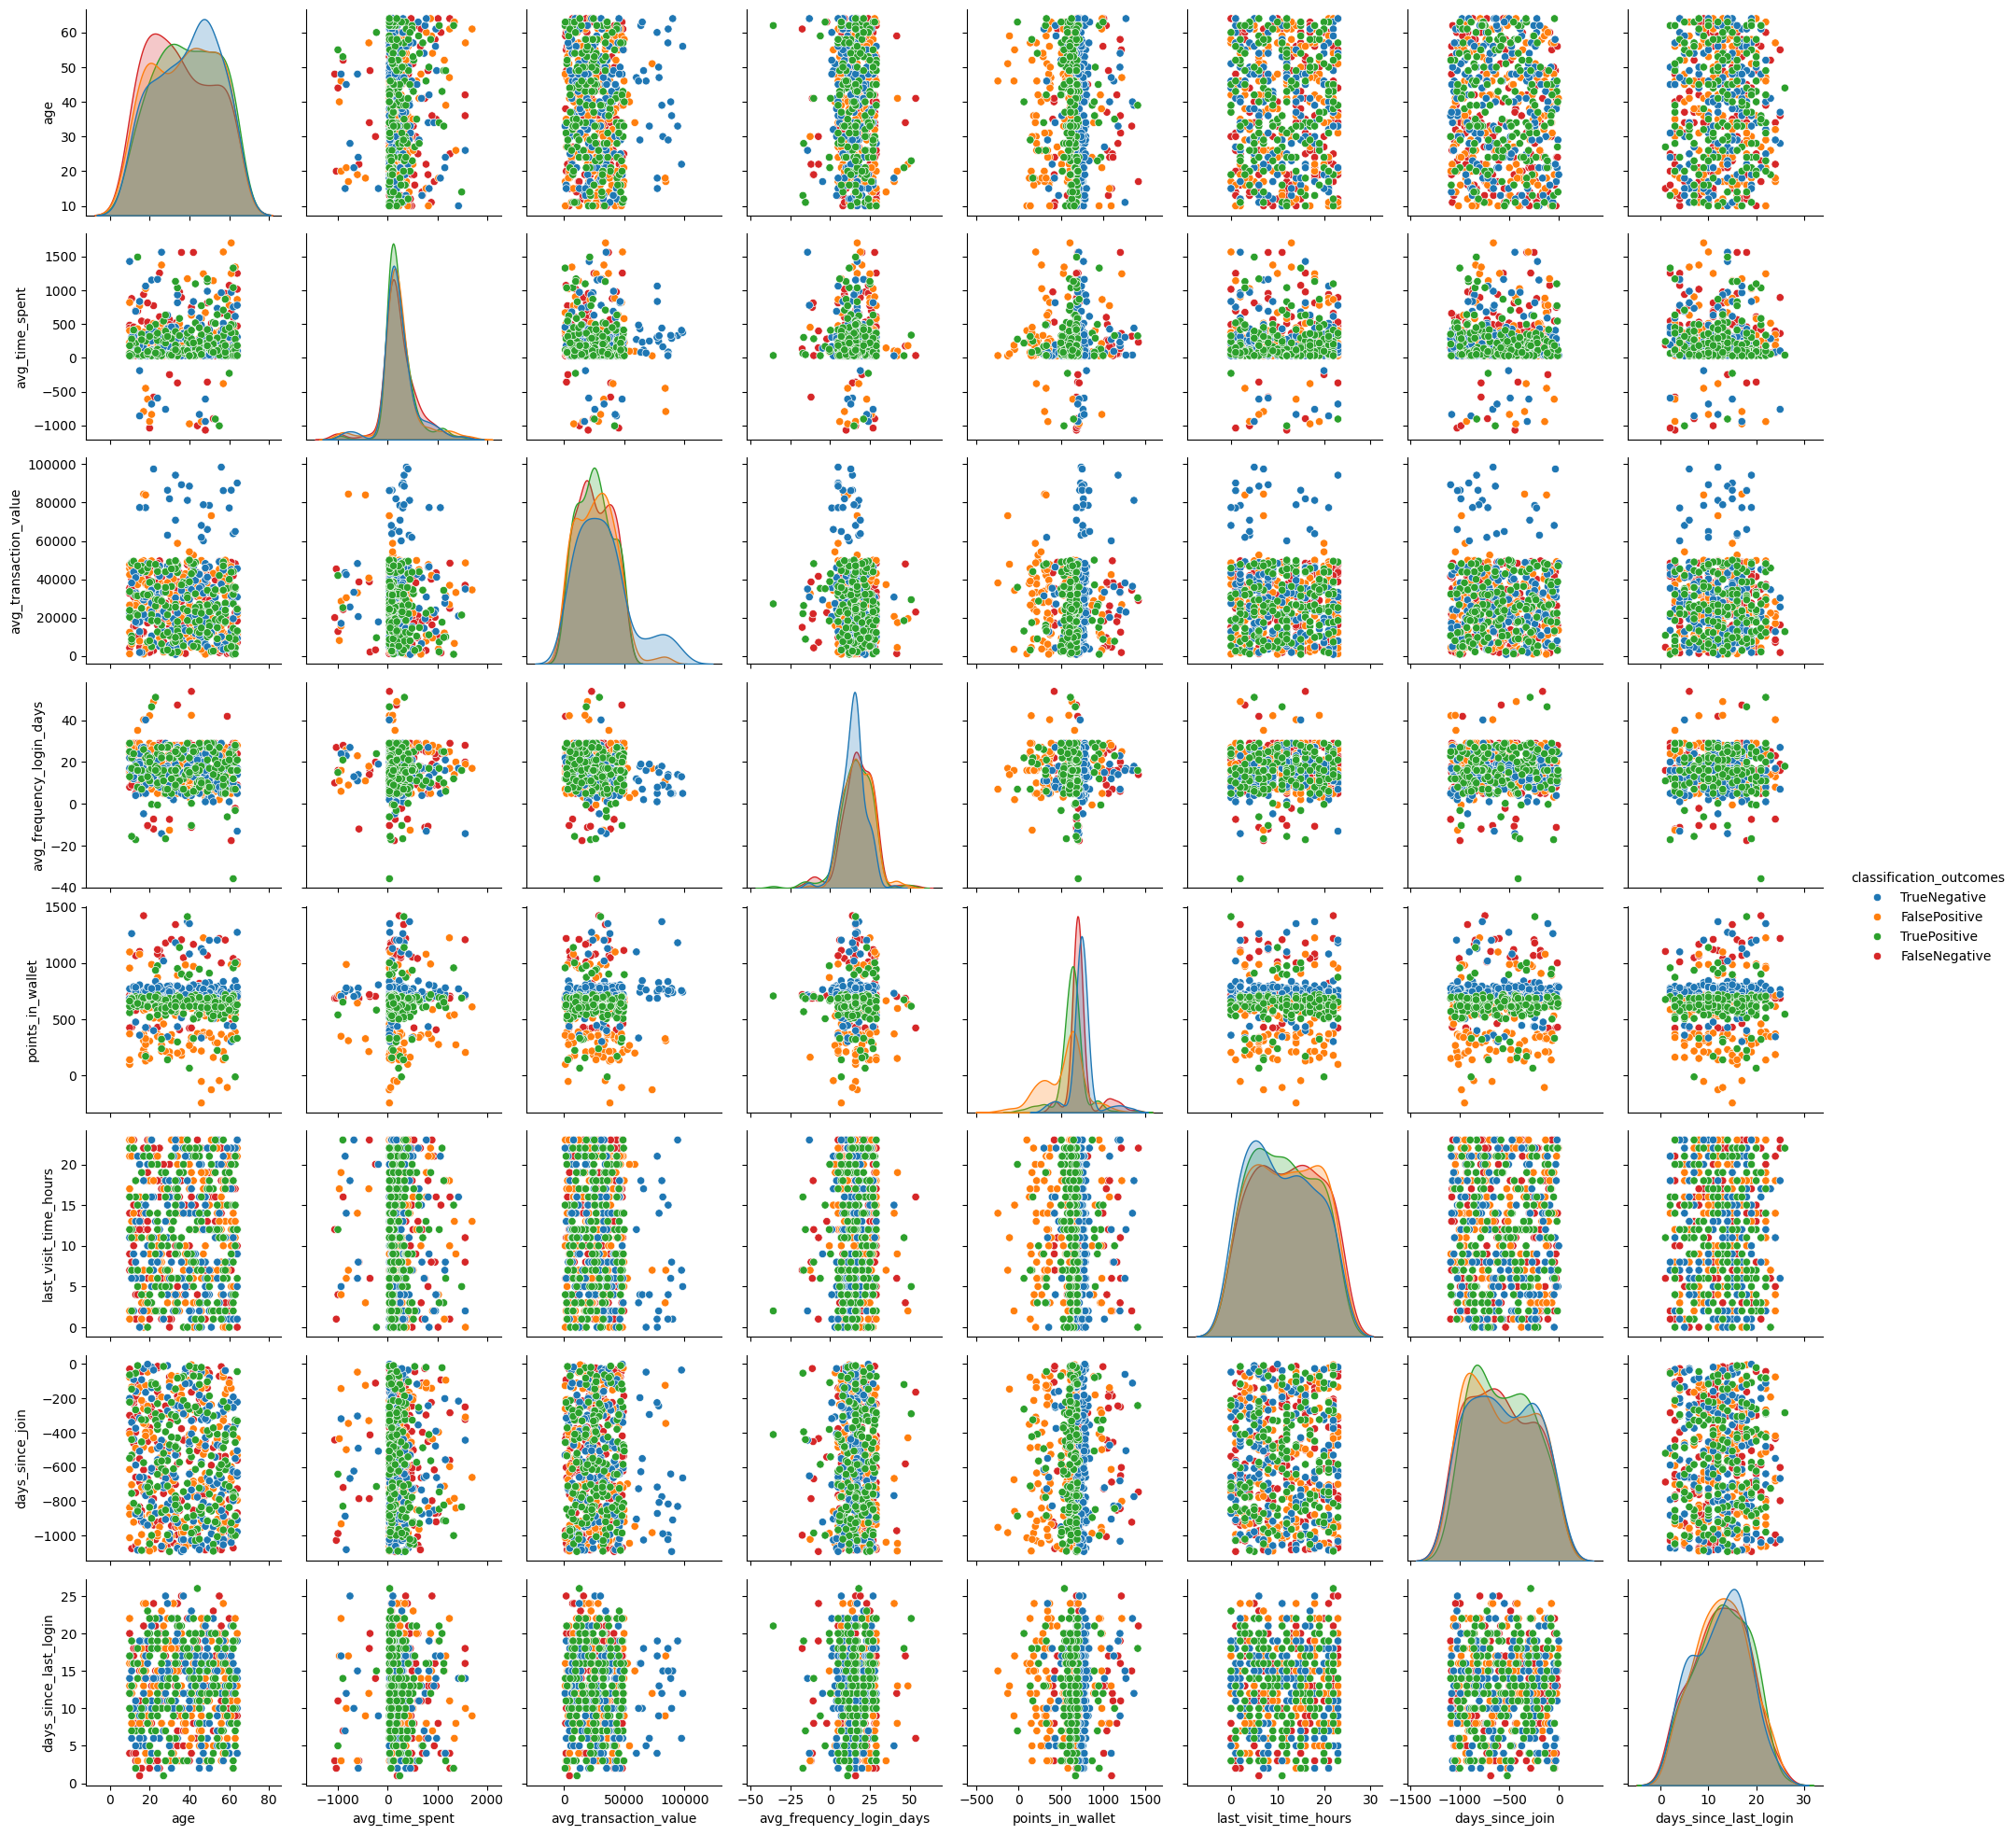

In [9]:
# Count the occurrences of each category
category_counts = df_test_eval['classification_outcomes'].value_counts()

# Set a sample size relatively to the count of the smallest category
sample_size = np.round(category_counts.min())

# Group the DataFrame by the category
grouped = df_test_eval.groupby('classification_outcomes')

# Sample each group to get a balanced DataFrame
balanced_df = grouped.apply(lambda x: x.sample(sample_size))

# Reset index of the resulting DataFrame
balanced_df = balanced_df.reset_index(drop=True)

#plot balanced df as pairplot
#take some hue_order as for the full dataset
sns.pairplot(balanced_df[num_features], hue='classification_outcomes', plot_kws=dict(alpha=1), hue_order= hue_order)

This overview indicates that for 'points_in_wallet' high values lead to a negative prediction (and therefore TN and FN), while low values lead to a positive prediction (and therefore TP and FP). 

### Barplot of the classification outcome for each categorical feature

**Please keep in mind that the features are One-Hot-Encoded in this notebook which makes it challenging to read the plots.**   
To avoid multicolinearity we had to drop one feature value by doing one-hot-encoding. For instance,  the female gender ('gender_F') is not included as a one-hot-encoded feature as it is implicitly included in the other gender features.

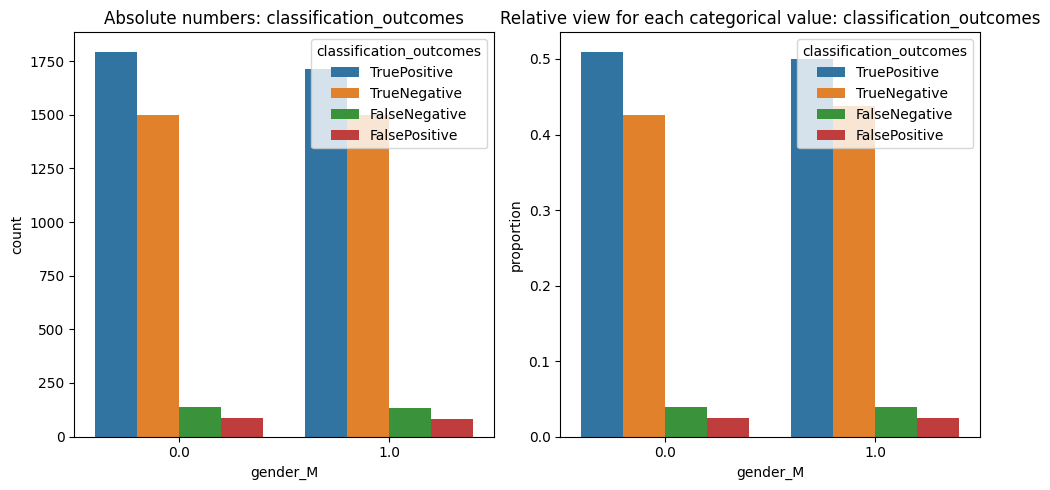

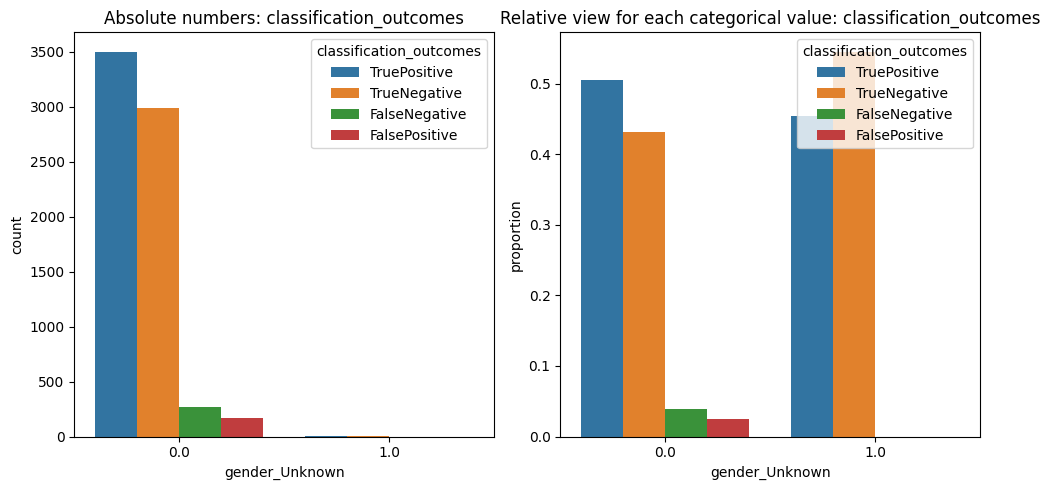

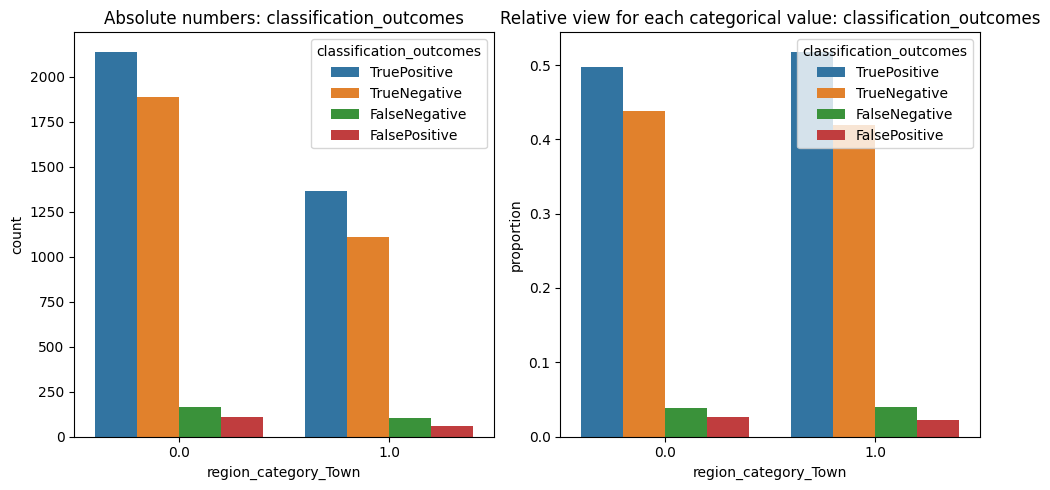

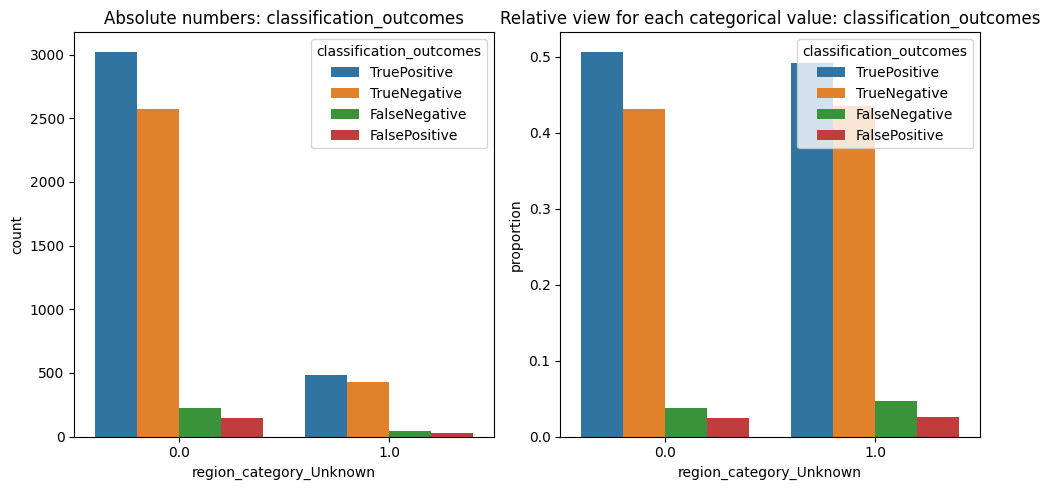

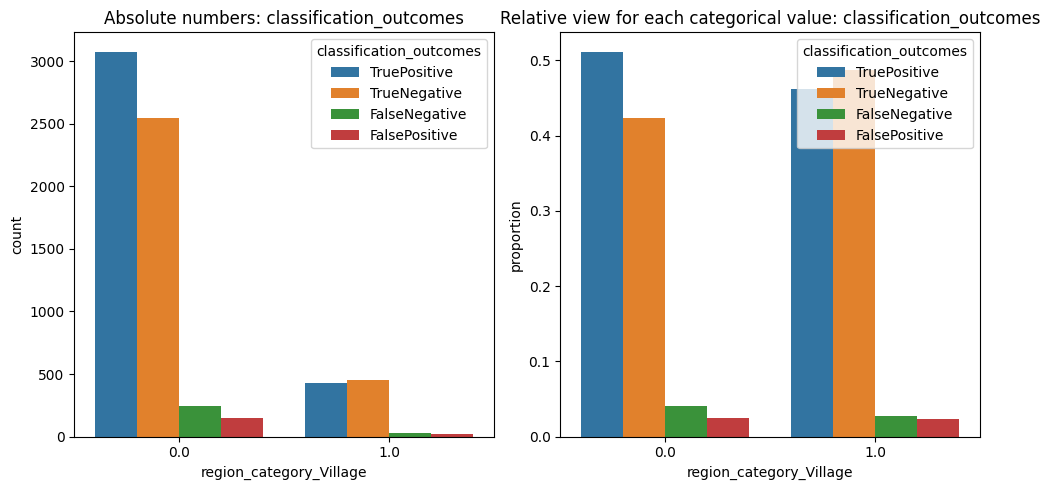

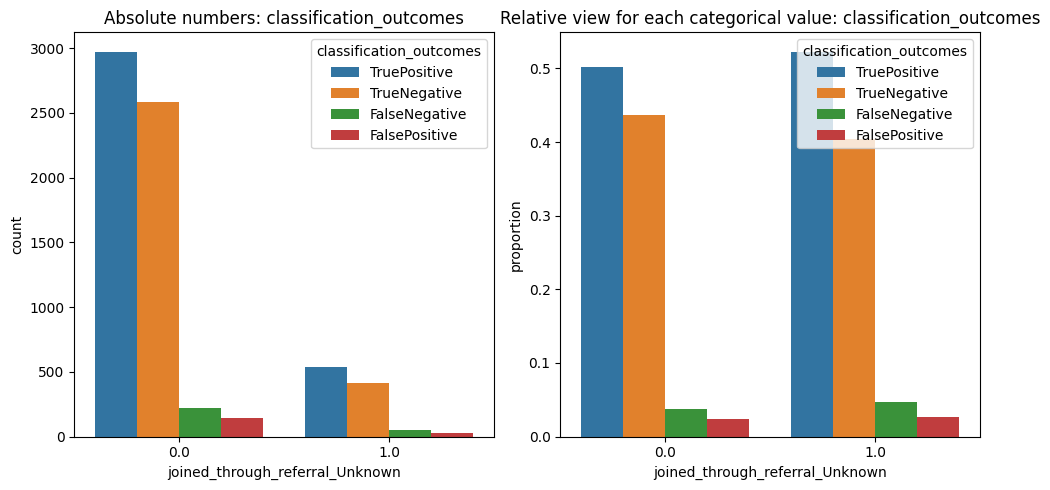

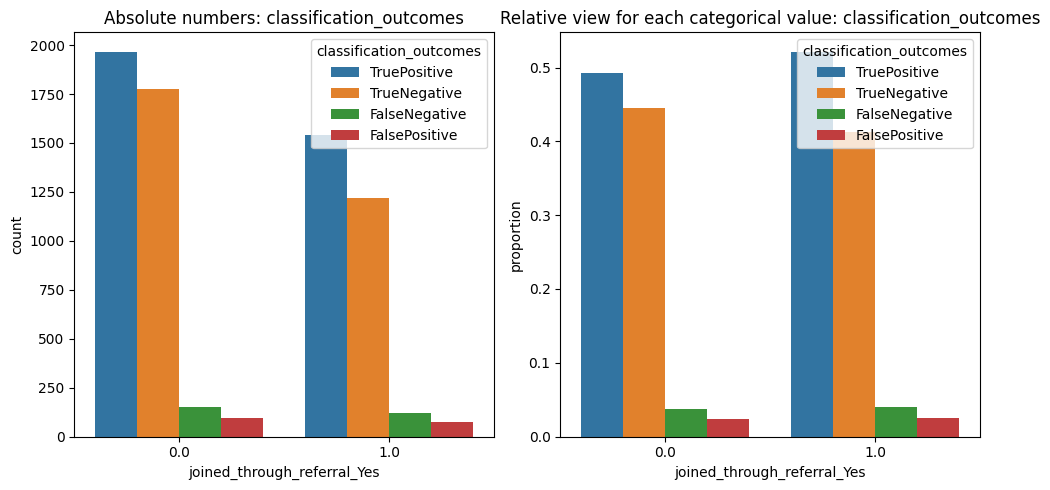

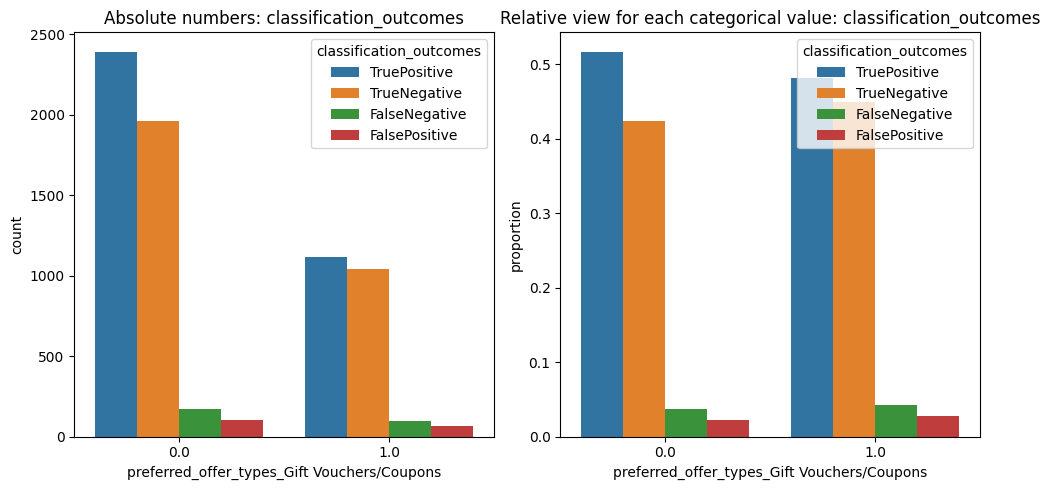

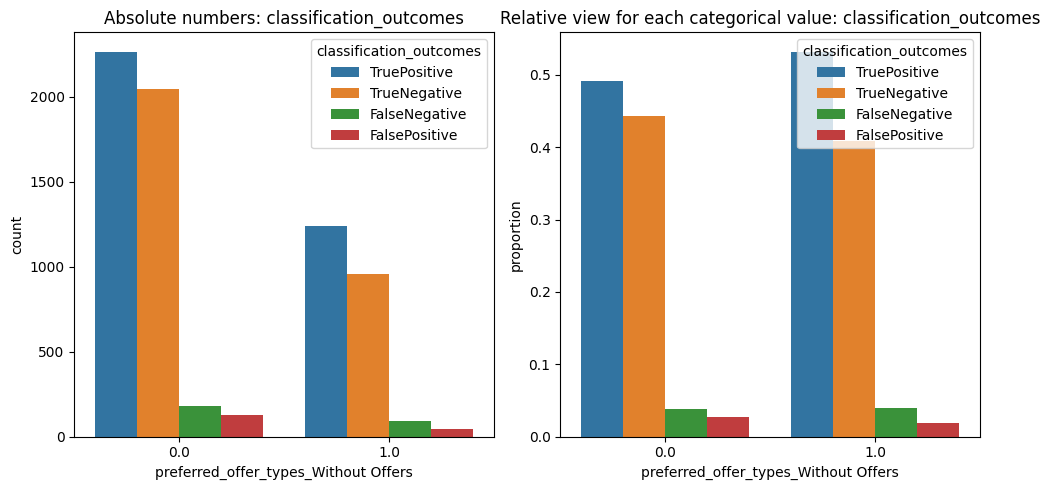

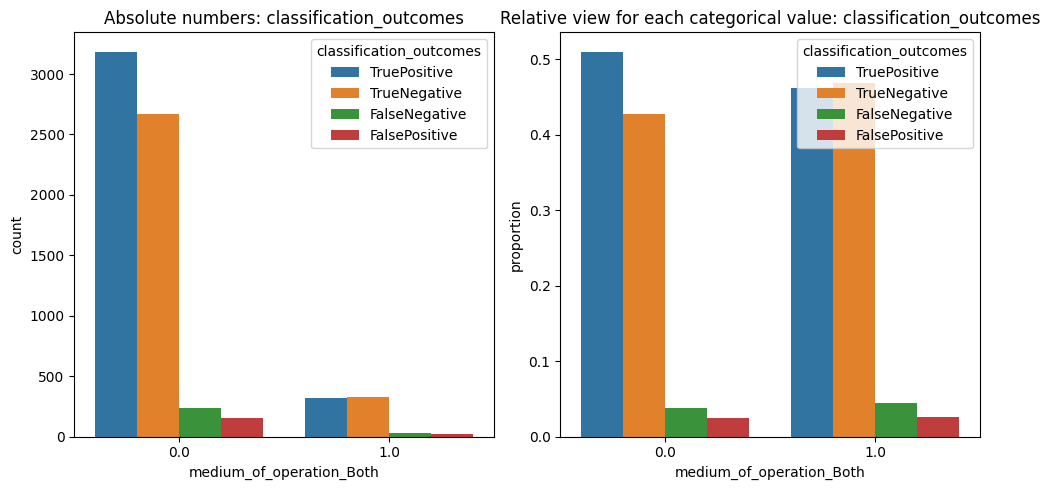

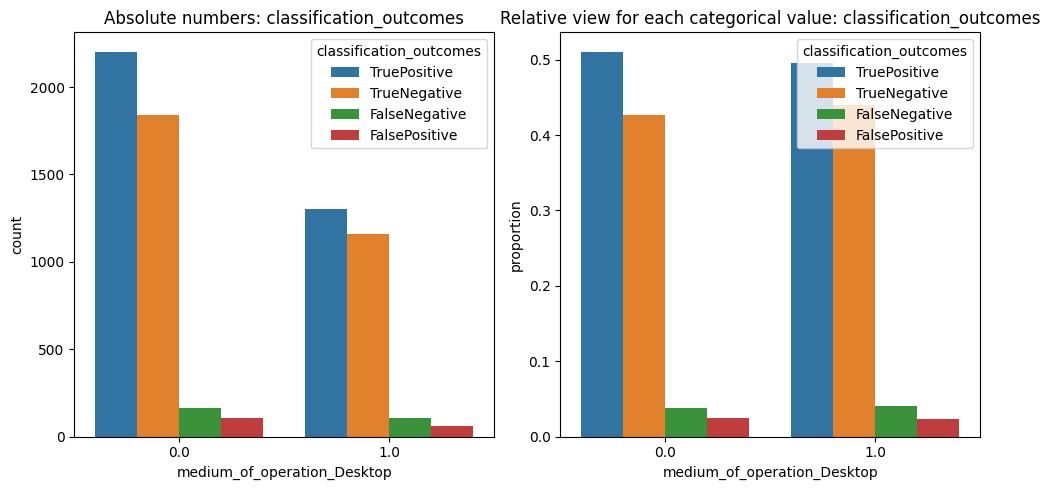

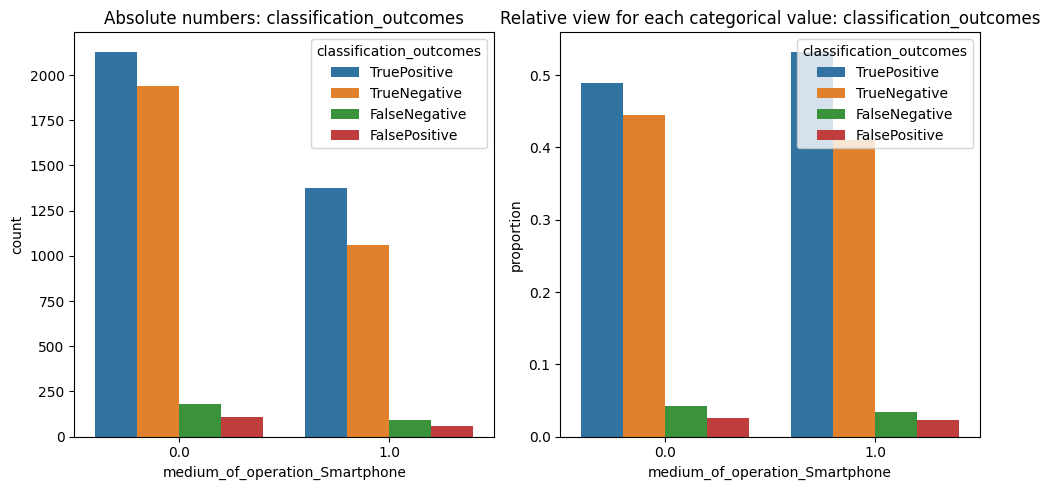

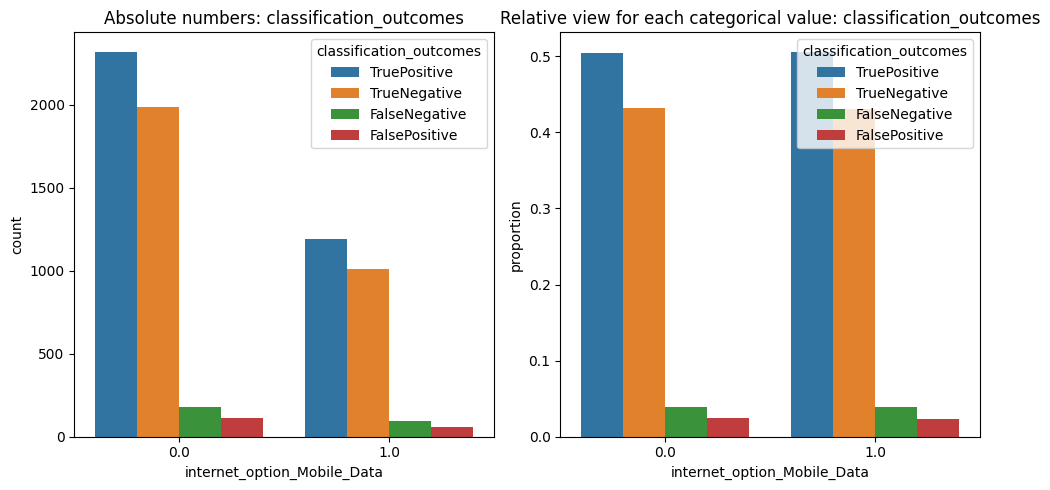

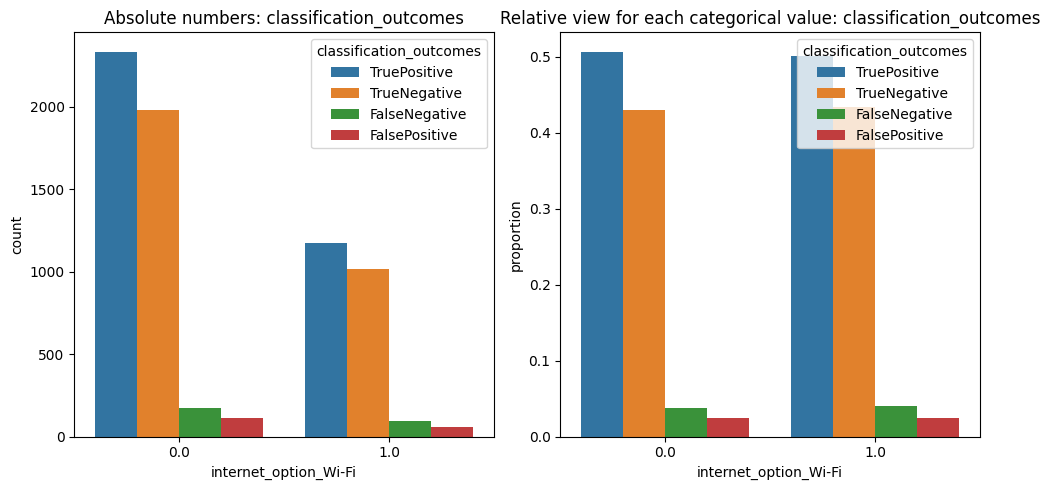

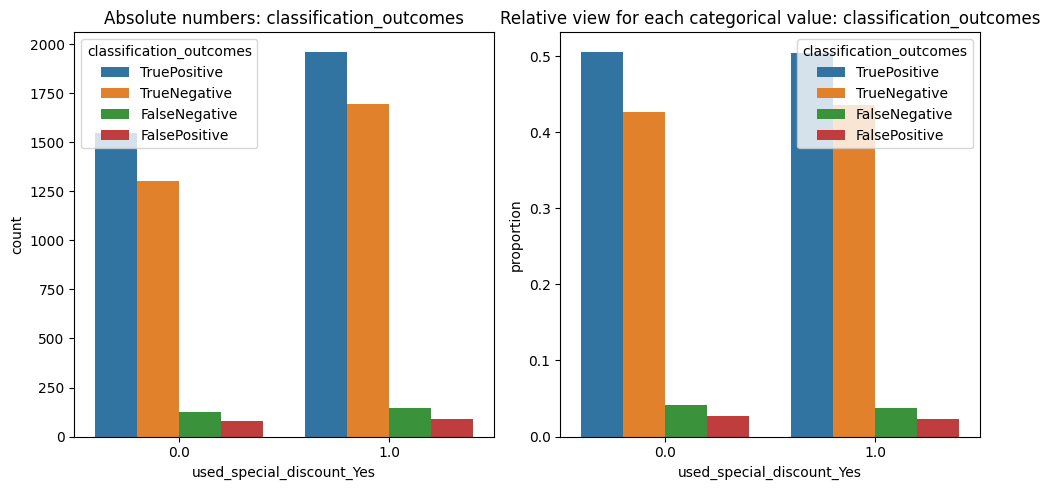

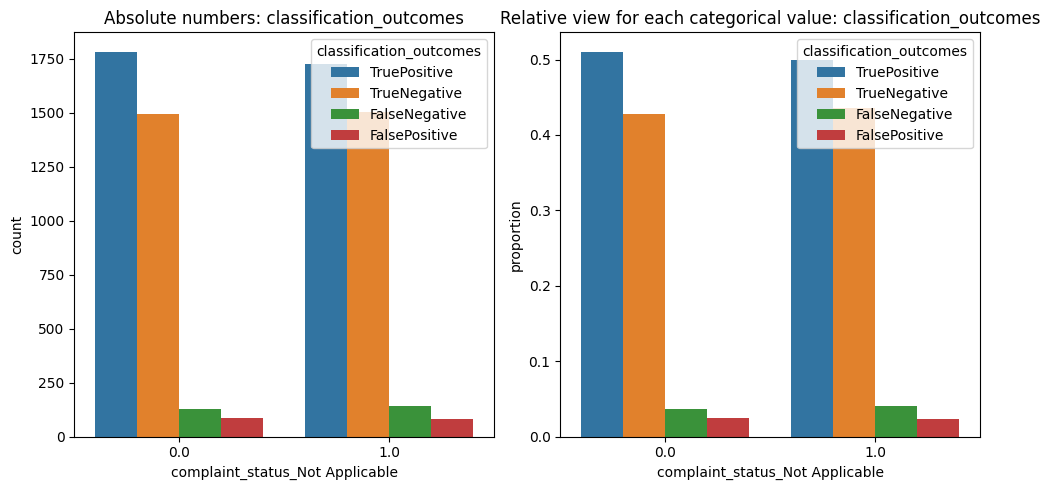

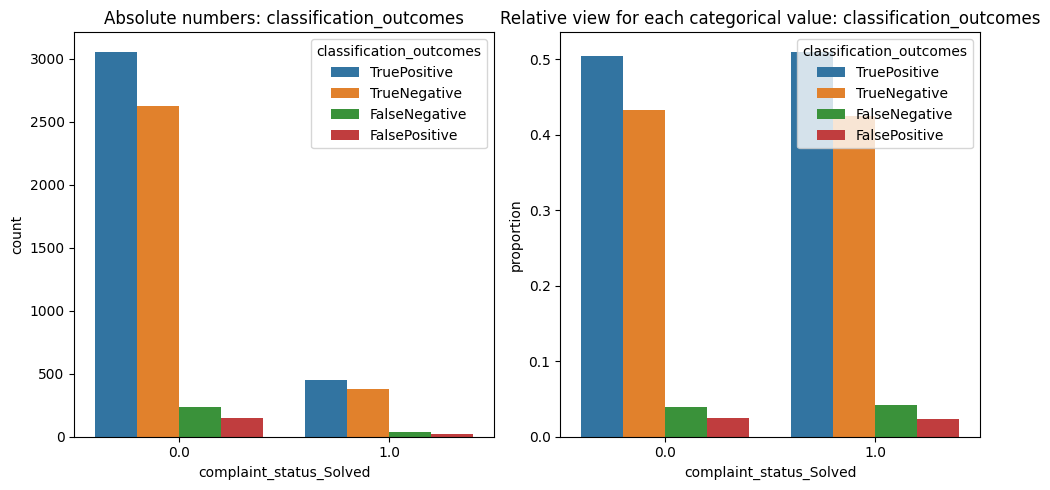

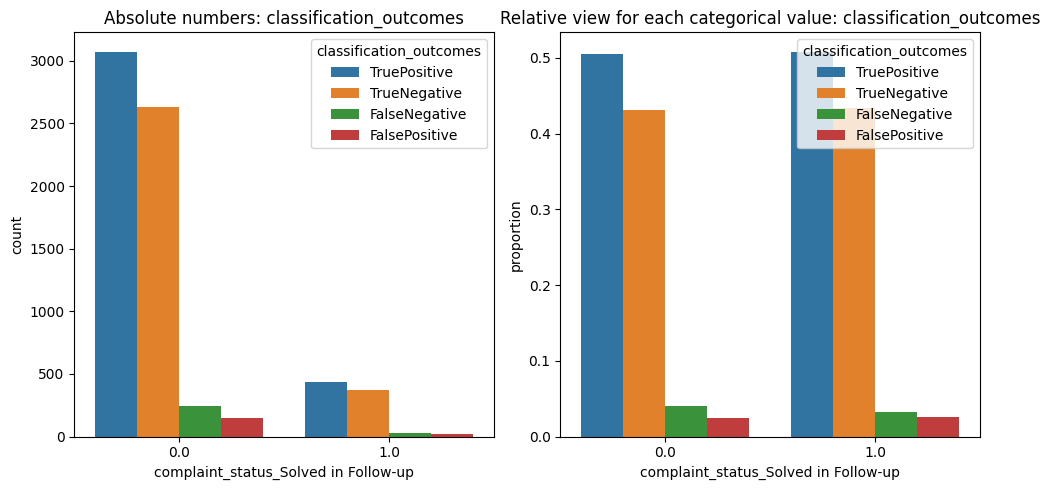

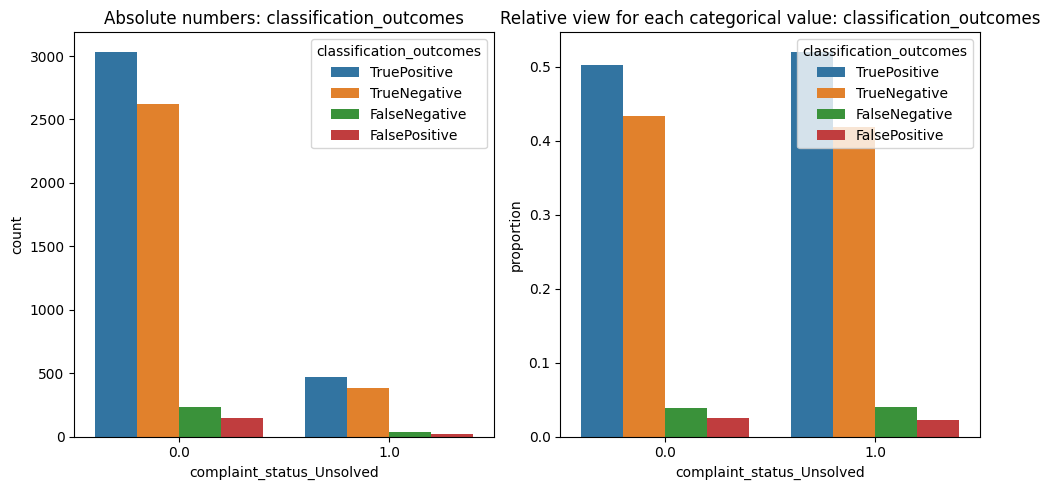

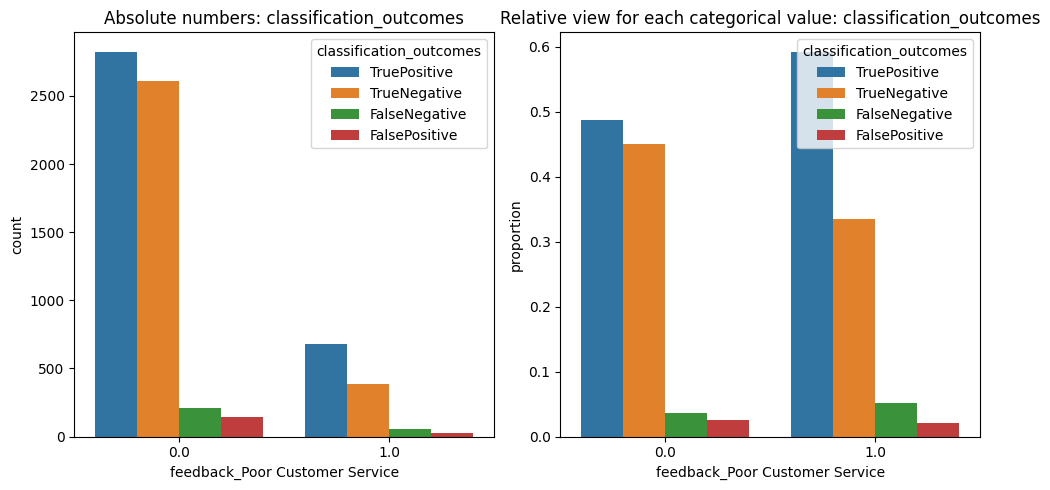

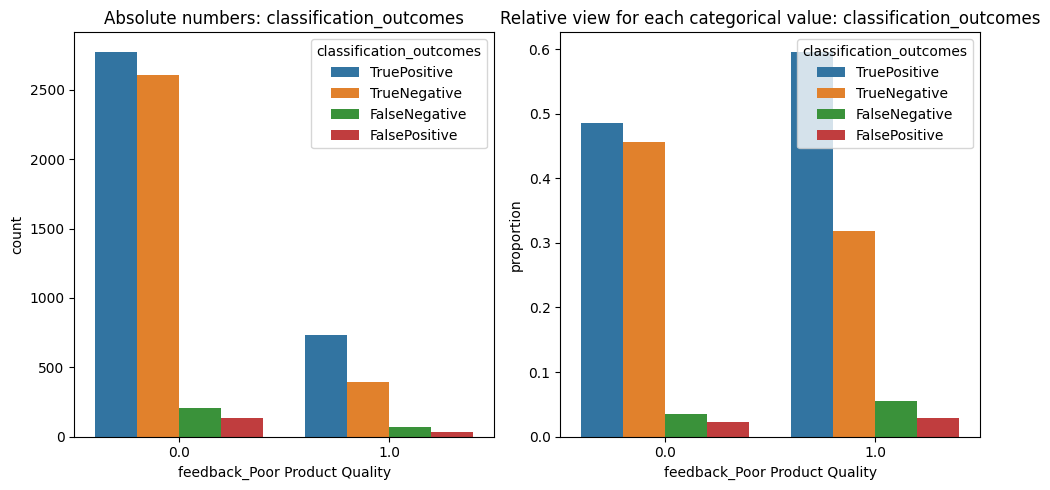

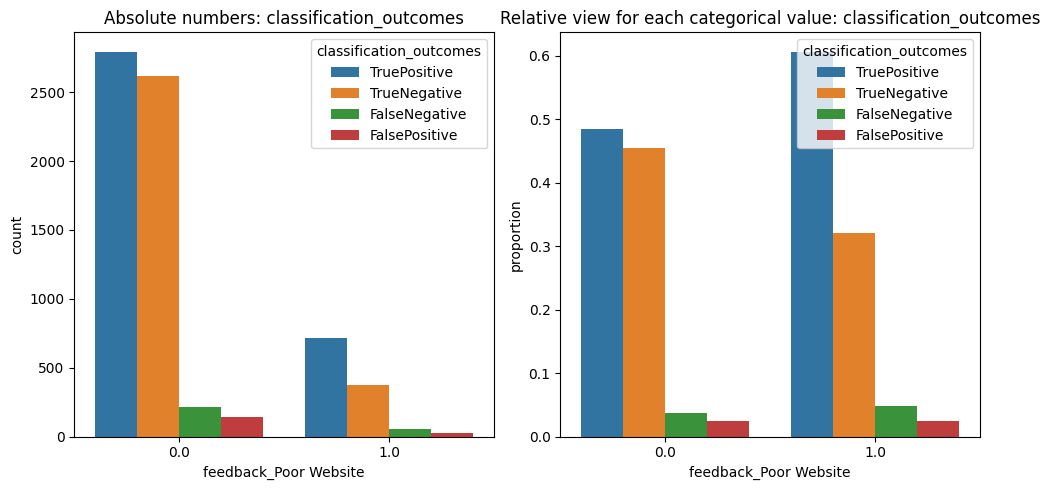

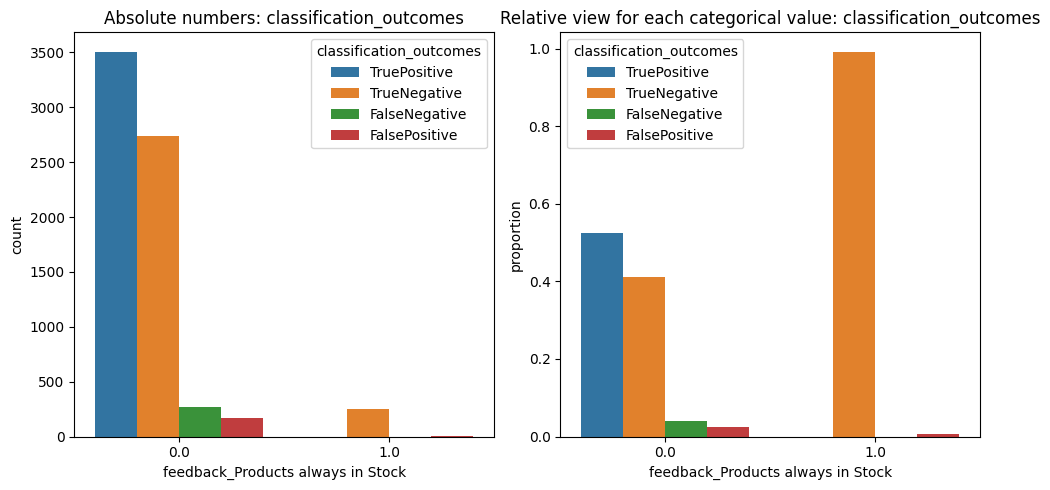

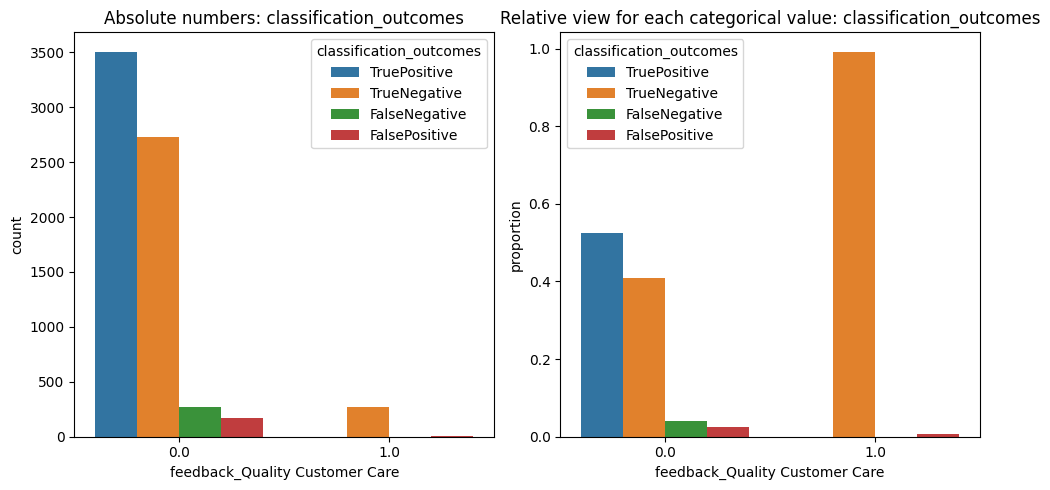

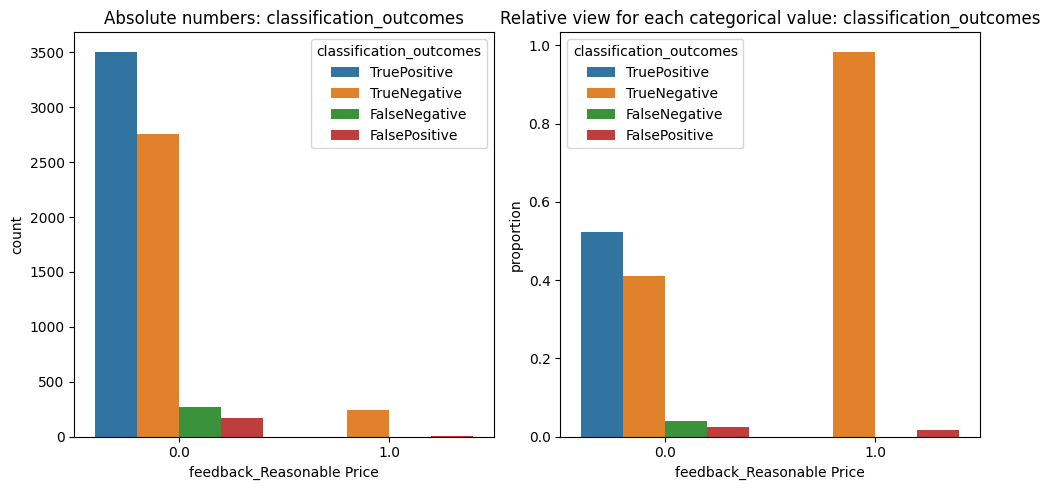

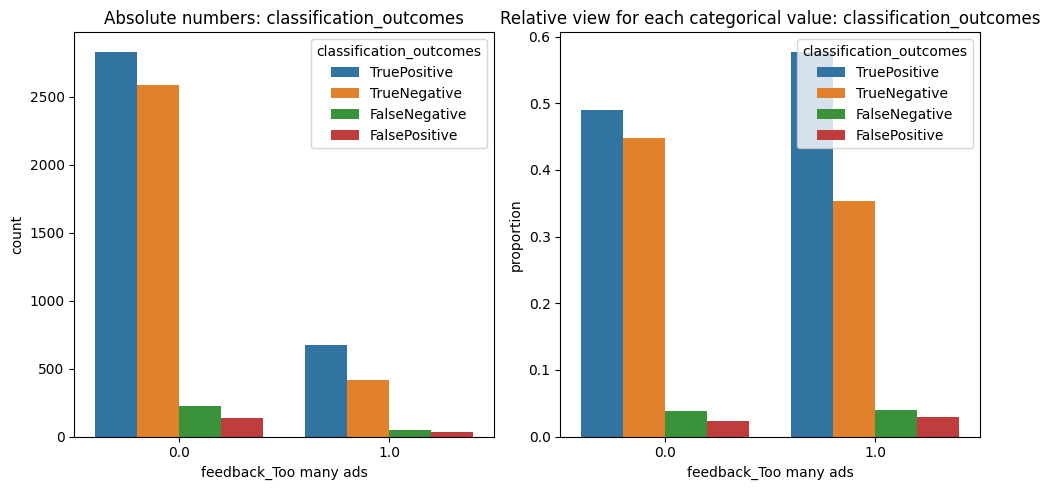

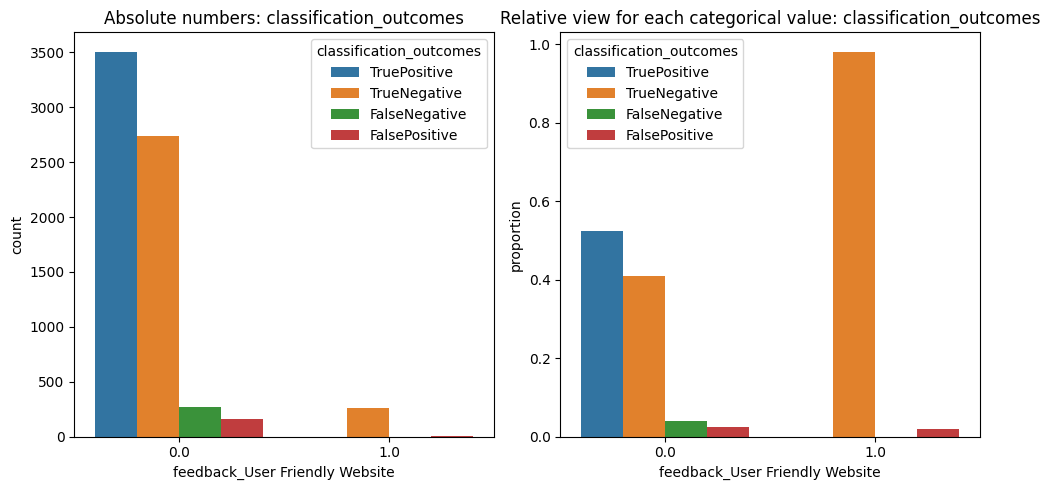

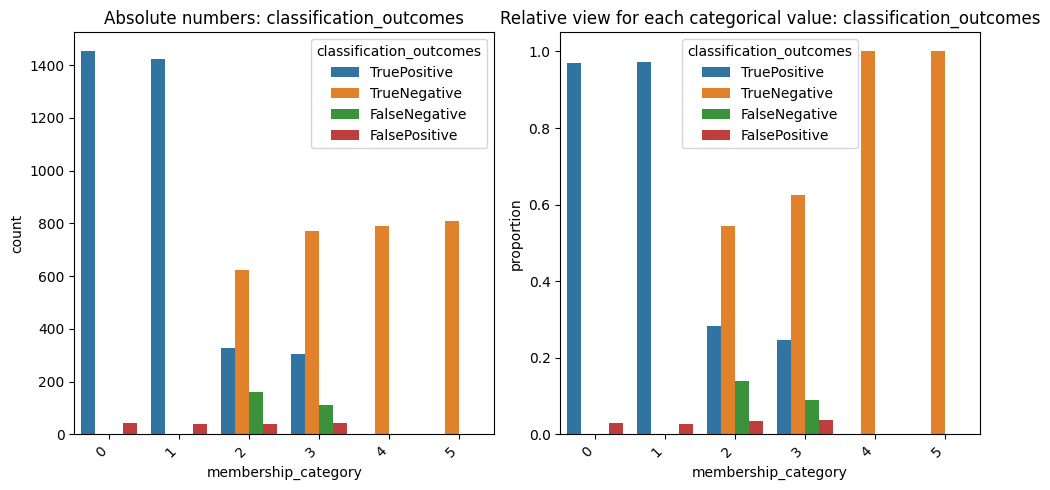

In [8]:
# Drop numerical features, predictions and ground truth ("churn_risk_score") to focus on categorical ones
categorical_features = [col for col in df_test_eval.columns if col not in num_features and col not in ["churn_risk_score", "y_pred"]]
# Plot a absolute an relative barplot of the classification outcome for each categorical feature
plot_categorical_features(df=df_test_eval, features=categorical_features, hue='classification_outcomes')

# Learnings

From the pairplot for numerical features and the barplots for categorical features, we identified the following patterns for correct and incorrect classifications:

1. As expected from high correlation of 'membership_category' and the 'churn_risk_score', there are very few misclassified observations for extreme membership category values (0, 1, 4 and 5), while intermediate values show higher percentages of FP and FN.
2. Positive feedback results in a majority of TN.
3. High 'avg_transaction_value' increases the chance for a negative prediction (TN and FN alike) and vice versa
4. High 'points_in_wallet' show a similar trend.

These findings are somehow in accordance with the feature importance for the decision tree model from notebook 05_02 where only 'membership_category' and 'points_in_wallet' are of importance. 'avg_transaction_value' has a small influence according to feature importance.
